In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [90]:
fname = "201215//201215_glass_R87_R1516_2w_measurement.csv"
fname2 = "201218//201218_glass_R87_R1516_2w_measurement_dry_ice.csv"
fn = "201215//201215_glass_R87_R1516_2w_measurement.txt"
fn2 = "201218//201218_glass_R87_R1516_2w_measurement_dry_ice.txt"

In [98]:
df = pd.read_csv(fname, sep = ',', header = 0, names = ['R', 'original_X2','original_Y2', 'f', 'X2','Y2','theta','theta_smooth'])
df2 = pd.read_csv(fname2, sep = ',', header = 0, names = ['R', 'original_X2','original_Y2', 'f', 'X2','Y2','theta','theta_smooth'])
df3 = pd.read_csv(fn, sep = ' ')
df4 = pd.read_csv(fn2, sep = ' ')
df3.rename(columns = {'Lockin1f':'f'}, inplace = True)
df4.rename(columns = {'Lockin1f' : 'f'}, inplace = True)

In [152]:
df3.head()
V1w_ave = np.mean(df3['X1'])
print(V1w_ave)

0.48880999999999997


In [153]:
#plt.plot(df3['f'],[df4['X1'].iloc[i] / df3['X1'].iloc[i] for i in range(0, len(df3['X1']))])

np.mean(df4['X1'])/np.mean(df3['X1'])
print(np.mean(df4['X1']))

0.45417053333333324


In [114]:
df4.head()

,Date_time,Time,TC,SENS,f,Lockin2f,X1,Y1,X2,Y2
2020-12-18,14:44:33.502474,130.894487,11,16,10.000,10.0000,0.459108,0.006348,-0.000262,-0.000241
2020-12-18,14:46:43.718922,261.110934,11,16,11.931,11.9305,0.458742,0.005249,-0.000252,-0.000210
2020-12-18,14:48:53.972372,391.363384,11,16,14.236,14.2355,0.458132,0.004334,-0.000242,-0.000180
2020-12-18,14:51:04.205821,521.596833,11,16,16.986,16.9854,0.457399,0.003601,-0.000230,-0.000152
2020-12-18,14:53:14.449271,651.814281,11,16,20.260,20.2599,0.456789,0.002991,-0.000217,-0.000125


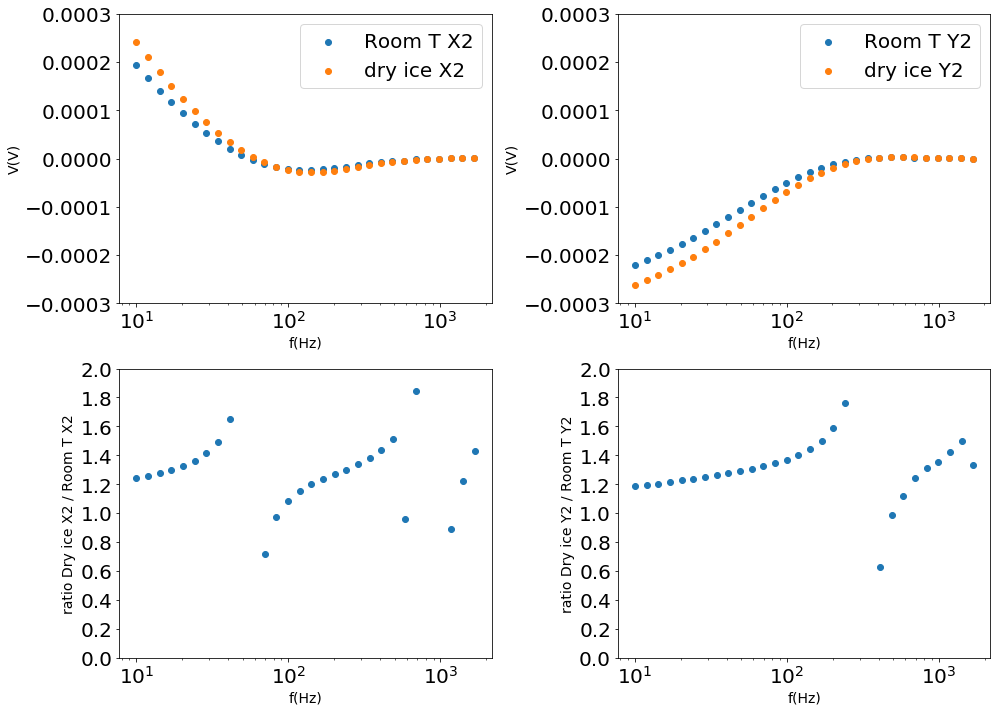

In [150]:
fig, axs = plt.subplots(2,2,figsize = (14,10))
axs = axs.flatten()
fz = 14
axs[0].scatter(df['f'], df['X2'], label = 'Room T X2')
axs[0].scatter(df2['f'], df2['X2'], label = 'dry ice X2')
axs[0].set_xlabel('f(Hz)', fontsize = fz)
axs[0].set_ylabel('V(V)', fontsize = fz)
axs[0].set_xscale('log')
axs[0].set_ylim([-300e-6, 300e-6])
axs[0].tick_params(labelsize = 20)
axs[0].legend(loc = 'upper right', fontsize = 20)

axs[1].scatter(df['f'],df['Y2'],label = 'Room T Y2')
axs[1].scatter(df2['f'],df2['Y2'],label = 'dry ice Y2')
axs[1].set_xscale('log')
axs[1].set_xlabel('f(Hz)', fontsize = fz)
axs[1].set_ylabel('V(V)', fontsize = fz)
axs[1].set_xscale('log')
axs[1].set_ylim([-300e-6, 300e-6])
axs[1].tick_params(labelsize = 20)
axs[1].legend(loc = 'upper right', fontsize = 20)

axs[2].scatter(df['f'], [df2['X2'].iloc[i] / df['X2'].iloc[i] for i in range(0, len(df['X2']))])
axs[2].set_xlabel('f(Hz)', fontsize = fz)
axs[2].set_ylabel('ratio Dry ice X2 / Room T X2', fontsize = fz)
axs[2].set_xscale('log')
axs[2].set_ylim([0, 2])
axs[2].set_yticks(np.arange(0,2.2,0.2))
axs[2].tick_params(labelsize = 20)

axs[3].scatter(df['f'],[df2['Y2'].iloc[i] / df['Y2'].iloc[i] for i in range(0, len(df['X2']))])
axs[3].set_xscale('log')
axs[3].set_xlabel('f(Hz)', fontsize = fz)
axs[3].set_ylabel('ratio Dry ice Y2 / Room T Y2', fontsize = fz)
axs[3].set_xscale('log')
axs[3].set_ylim([0, 2])
axs[3].set_yticks(np.arange(0, 2.2, 0.2))
axs[3].tick_params(labelsize = 20)

plt.tight_layout()
fig.savefig('201218//glass_1_2w_dry_ice_room_T_comparison.png', dpi = 100)

In [131]:
np.mean([df2['X2'].iloc[i] / df['X2'].iloc[i] for i in range(0, len(df['X2']))])

1.1811963450384642

In [132]:
np.mean([df2['Y2'].iloc[i] / df['Y2'].iloc[i] for i in range(0, len(df['X2']))])

1.1966260952062913

In [135]:
np.mean([1.181,1.196])

1.1884999999999999

In [140]:
mask = df2['f'] < 40
x2mean= np.mean([df2['X2'][mask].iloc[i] / df['X2'][mask].iloc[i] for i in range(0, len(df['X2'][mask]))])
y2mean= np.mean([df2['Y2'][mask].iloc[i] / df['Y2'][mask].iloc[i] for i in range(0, len(df['X2'][mask]))])
print(x2mean, y2mean)

1.33376971622 1.22253187377


In [148]:
np.mean([df2['X2'].iloc[i] / df['X2'].iloc[i] for i in range(0, len(df['X2'][mask]))][0:5])

1.2802428741927634

In [149]:
np.mean([df2['Y2'].iloc[i] / df['Y2'].iloc[i] for i in range(0, len(df['X2'][mask]))][0:5])

1.2061992403157737

In [145]:
(1.241 + 1.188) / 2

1.2145000000000001